In [1]:
# notebooks/1.0-eda.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv("/Users/tagesehandiso/Downloads/game/Kifya/data.csv")


In [2]:

# Display basic info
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
display(df.head())

Shape: (95662, 16)

Data Types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

Missing Values:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: 

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [3]:
# Summary stats for numerical columns
display(df.describe())


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [4]:
# Categorical value counts
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


Value counts for TransactionId:
 TransactionId
TransactionId_76871     1
TransactionId_74922     1
TransactionId_2737      1
TransactionId_28101     1
TransactionId_33267     1
                       ..
TransactionId_32860     1
TransactionId_139405    1
TransactionId_65784     1
TransactionId_8889      1
TransactionId_35670     1
Name: count, Length: 95662, dtype: int64

Value counts for BatchId:
 BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
                  ..
BatchId_23939      1
BatchId_104215     1
BatchId_116411     1
BatchId_36631      1
BatchId_29317      1
Name: count, Length: 94809, dtype: int64

Value counts for AccountId:
 AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
                  ...  
AccountId_4180        1
AccountId_63          1
AccountId_3497        1
AccountId_2010        1
AccountId_1685        1
Name: count, 

In [5]:
# Convert TransactionStartTime to datetime
df["TransactionStartTime"] = pd.to_datetime(df["TransactionStartTime"], errors='coerce')

# Extract datetime features
df["Hour"] = df["TransactionStartTime"].dt.hour
df["Day"] = df["TransactionStartTime"].dt.day
df["Month"] = df["TransactionStartTime"].dt.month

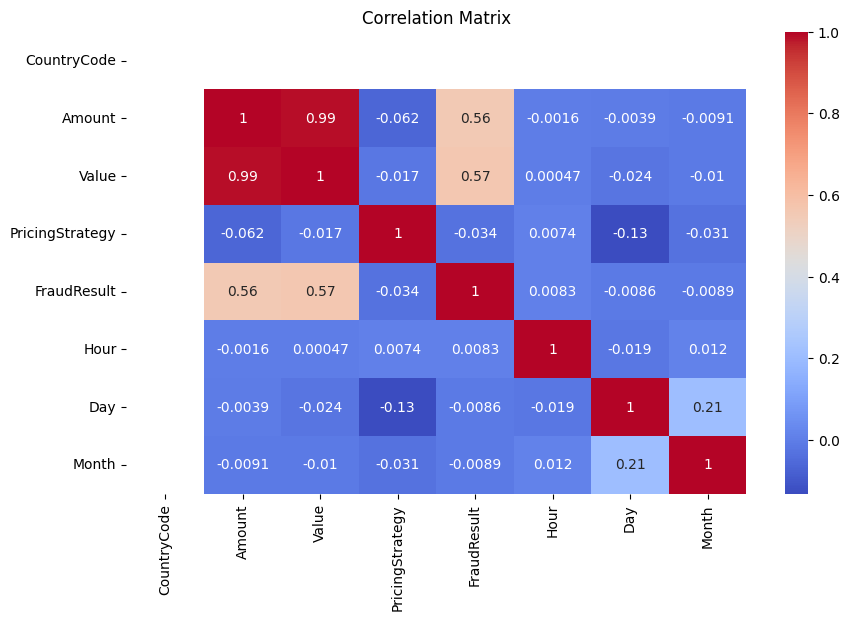

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
